# Image Colorization Project - Data Exploration

This notebook helps you explore and understand your dataset before training.

## Objectives:
- Analyze dataset structure and statistics
- Visualize color distributions
- Check image quality and formats
- Identify potential issues

In [7]:
# Import required libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from pathlib import Path
import pandas as pd
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../src')
from utils import calculate_dataset_statistics, visualize_color_distribution

print("Libraries imported successfully!")
print(f"Current working directory: {os.getcwd()}")

Libraries imported successfully!
Current working directory: D:\colorization_task4\dataset_augmentation\notebooks


## 1. Dataset Overview

In [8]:
# Define data directories
data_root = "../data/raw"
train_dir = os.path.join(data_root, "train")
val_dir = os.path.join(data_root, "val")
test_dir = os.path.join(data_root, "test")

# Check if directories exist
directories = [train_dir, val_dir, test_dir]
for directory in directories:
    if os.path.exists(directory):
        print(f"✓ {directory} exists")
    else:
        print(f"✗ {directory} does not exist")
        os.makedirs(directory, exist_ok=True)
        print(f"  Created {directory}")

✓ ../data/raw\train exists
✓ ../data/raw\val exists
✓ ../data/raw\test exists


In [9]:
# Count images in each directory
def count_images(directory):
    """Count image files in a directory."""
    if not os.path.exists(directory):
        return 0
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    count = 0
    
    for file in os.listdir(directory):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            count += 1
    
    return count

# Count images
train_count = count_images(train_dir)
val_count = count_images(val_dir)
test_count = count_images(test_dir)
total_count = train_count + val_count + test_count

print("Dataset Statistics:")
print(f"Training images: {train_count}")
print(f"Validation images: {val_count}")
print(f"Test images: {test_count}")
print(f"Total images: {total_count}")

if total_count == 0:
    print("\n⚠️  No images found! Please add images to the data/raw/ directories.")
    print("   Refer to the README.md for instructions on obtaining datasets.")

Dataset Statistics:
Training images: 9
Validation images: 9
Test images: 9
Total images: 27


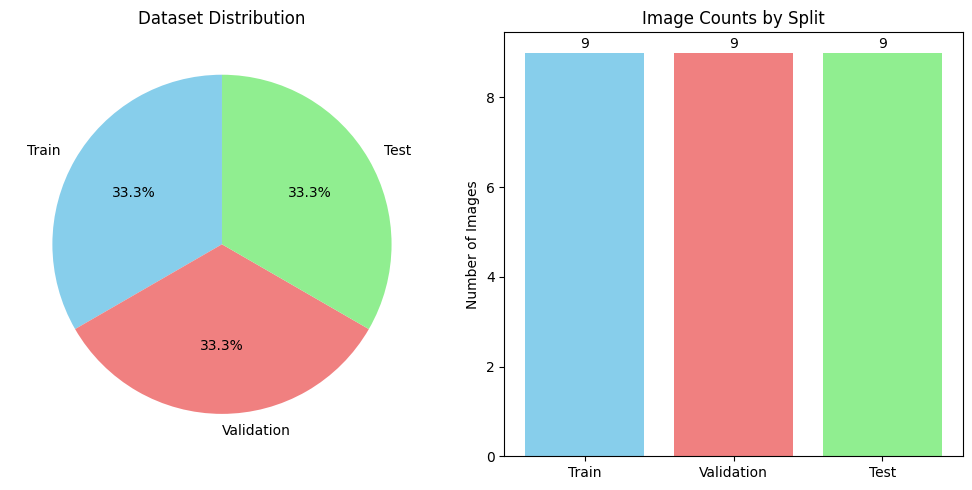

In [10]:
# Visualize dataset distribution
if total_count > 0:
    # Create pie chart
    sizes = [train_count, val_count, test_count]
    labels = ['Train', 'Validation', 'Test']
    colors = ['skyblue', 'lightcoral', 'lightgreen']
    
    plt.figure(figsize=(10, 5))
    
    # Pie chart
    plt.subplot(1, 2, 1)
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Dataset Distribution')
    
    # Bar chart
    plt.subplot(1, 2, 2)
    plt.bar(labels, sizes, color=colors)
    plt.title('Image Counts by Split')
    plt.ylabel('Number of Images')
    
    for i, v in enumerate(sizes):
        plt.text(i, v + max(sizes)*0.01, str(v), ha='center')
    
    plt.tight_layout()
    plt.show()

## 2. Image Analysis

In [11]:
# Analyze image properties
def analyze_images(directory, max_samples=50):
    """Analyze image properties in a directory."""
    if not os.path.exists(directory) or count_images(directory) == 0:
        return None
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    image_files = []
    
    for file in os.listdir(directory):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_files.append(os.path.join(directory, file))
    
    # Sample images if too many
    if len(image_files) > max_samples:
        image_files = np.random.choice(image_files, max_samples, replace=False)
    
    properties = {
        'widths': [],
        'heights': [],
        'aspects': [],
        'formats': [],
        'sizes_mb': [],
        'modes': []
    }
    
    for img_path in image_files:
        try:
            with Image.open(img_path) as img:
                properties['widths'].append(img.width)
                properties['heights'].append(img.height)
                properties['aspects'].append(img.width / img.height)
                properties['formats'].append(img.format)
                properties['modes'].append(img.mode)
                
            # File size
            size_mb = os.path.getsize(img_path) / (1024 * 1024)
            properties['sizes_mb'].append(size_mb)
            
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    
    return properties

# Analyze training images
if train_count > 0:
    print("Analyzing training images...")
    train_props = analyze_images(train_dir)
    
    if train_props:
        print(f"\nTraining Set Analysis (sample of {len(train_props['widths'])} images):")
        print(f"Average width: {np.mean(train_props['widths']):.0f}px")
        print(f"Average height: {np.mean(train_props['heights']):.0f}px")
        print(f"Average aspect ratio: {np.mean(train_props['aspects']):.2f}")
        print(f"Average file size: {np.mean(train_props['sizes_mb']):.2f}MB")
        
        # Most common format
        format_counts = pd.Series(train_props['formats']).value_counts()
        print(f"Most common format: {format_counts.index[0]} ({format_counts.iloc[0]} files)")
        
        # Most common mode
        mode_counts = pd.Series(train_props['modes']).value_counts()
        print(f"Color modes: {dict(mode_counts)}")
else:
    print("No training images to analyze")

Analyzing training images...

Training Set Analysis (sample of 9 images):
Average width: 3062px
Average height: 3239px
Average aspect ratio: 1.11
Average file size: 2.78MB
Most common format: JPEG (9 files)
Color modes: {'RGB': np.int64(9)}


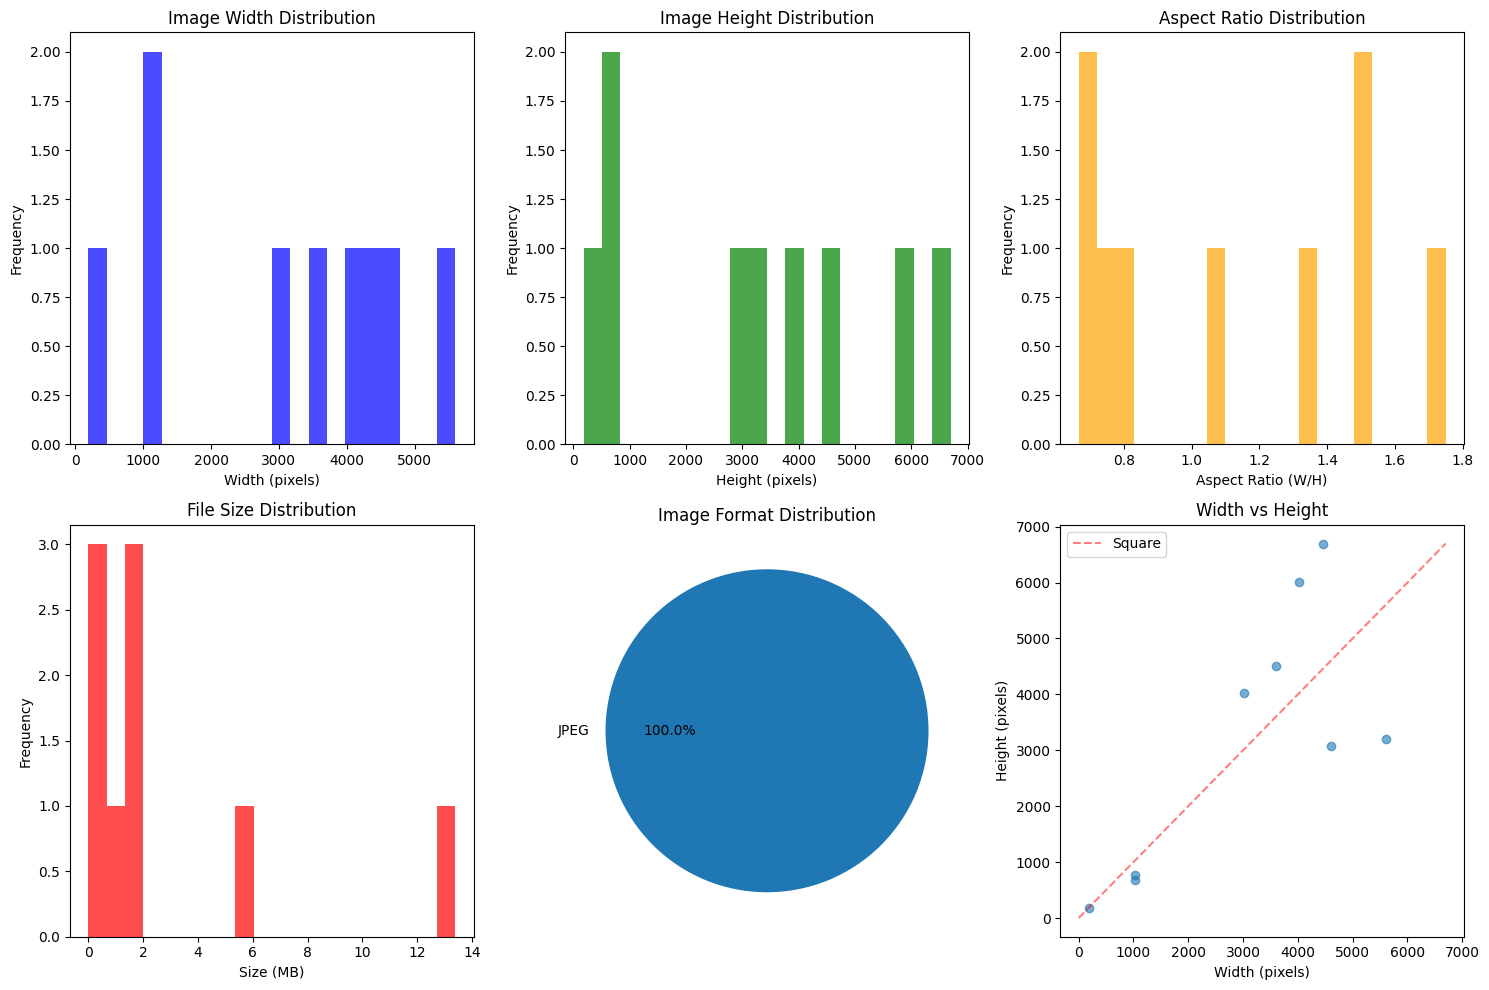

In [12]:
# Visualize image properties
if train_count > 0 and train_props:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Width distribution
    axes[0, 0].hist(train_props['widths'], bins=20, alpha=0.7, color='blue')
    axes[0, 0].set_title('Image Width Distribution')
    axes[0, 0].set_xlabel('Width (pixels)')
    axes[0, 0].set_ylabel('Frequency')
    
    # Height distribution
    axes[0, 1].hist(train_props['heights'], bins=20, alpha=0.7, color='green')
    axes[0, 1].set_title('Image Height Distribution')
    axes[0, 1].set_xlabel('Height (pixels)')
    axes[0, 1].set_ylabel('Frequency')
    
    # Aspect ratio distribution
    axes[0, 2].hist(train_props['aspects'], bins=20, alpha=0.7, color='orange')
    axes[0, 2].set_title('Aspect Ratio Distribution')
    axes[0, 2].set_xlabel('Aspect Ratio (W/H)')
    axes[0, 2].set_ylabel('Frequency')
    
    # File size distribution
    axes[1, 0].hist(train_props['sizes_mb'], bins=20, alpha=0.7, color='red')
    axes[1, 0].set_title('File Size Distribution')
    axes[1, 0].set_xlabel('Size (MB)')
    axes[1, 0].set_ylabel('Frequency')
    
    # Format distribution
    format_counts = pd.Series(train_props['formats']).value_counts()
    axes[1, 1].pie(format_counts.values, labels=format_counts.index, autopct='%1.1f%%')
    axes[1, 1].set_title('Image Format Distribution')
    
    # Width vs Height scatter
    axes[1, 2].scatter(train_props['widths'], train_props['heights'], alpha=0.6)
    axes[1, 2].set_title('Width vs Height')
    axes[1, 2].set_xlabel('Width (pixels)')
    axes[1, 2].set_ylabel('Height (pixels)')
    
    # Add diagonal line for square images
    max_dim = max(max(train_props['widths']), max(train_props['heights']))
    axes[1, 2].plot([0, max_dim], [0, max_dim], 'r--', alpha=0.5, label='Square')
    axes[1, 2].legend()
    
    plt.tight_layout()
    plt.show()

## 3. Sample Image Visualization

Sample Training Images:


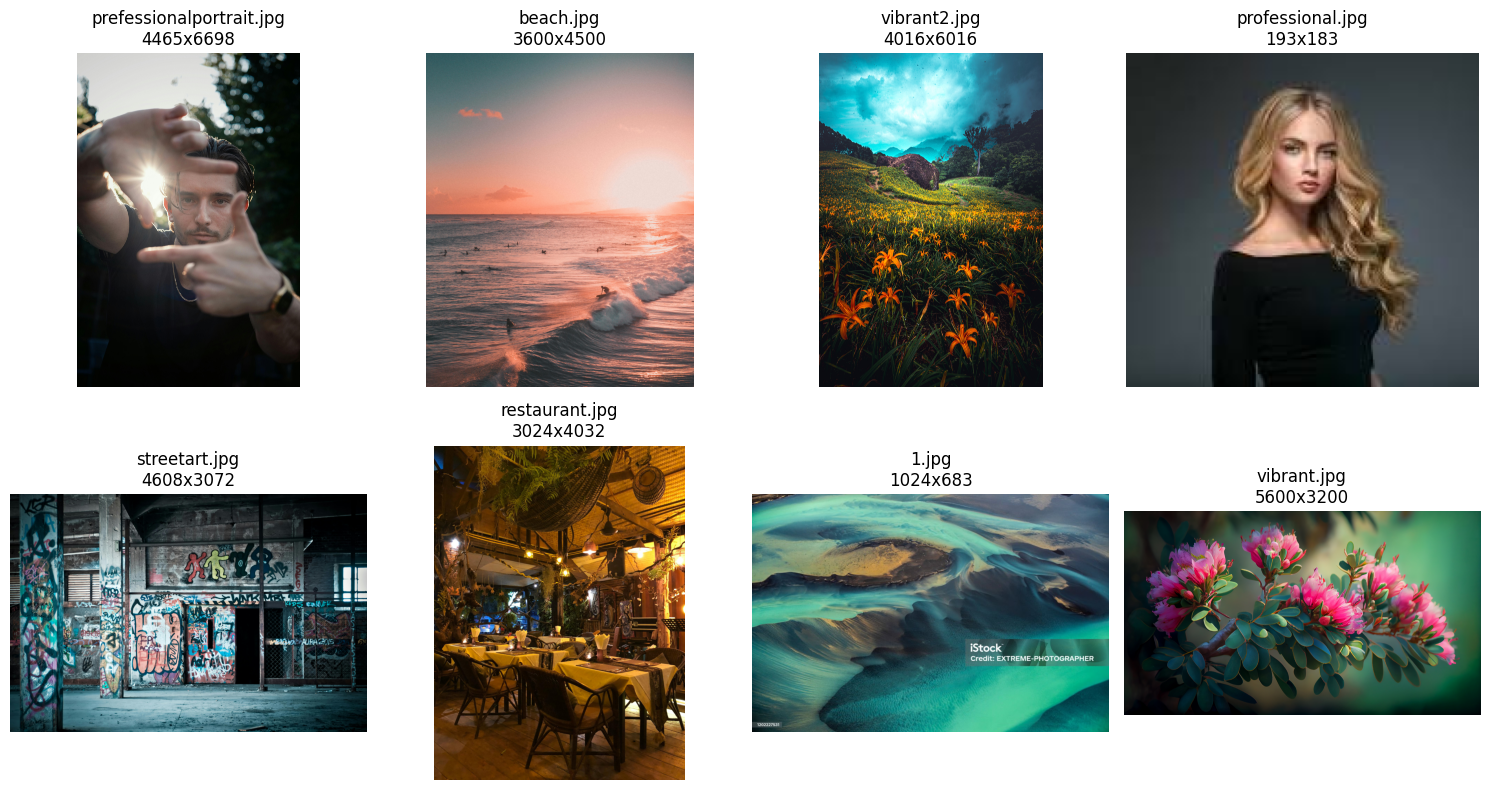

In [13]:
# Display sample images
def show_sample_images(directory, num_samples=8):
    """Display sample images from a directory."""
    if not os.path.exists(directory) or count_images(directory) == 0:
        print(f"No images found in {directory}")
        return
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    image_files = []
    
    for file in os.listdir(directory):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_files.append(os.path.join(directory, file))
    
    # Random sample
    if len(image_files) > num_samples:
        image_files = np.random.choice(image_files, num_samples, replace=False)
    
    # Calculate grid size
    cols = min(4, len(image_files))
    rows = (len(image_files) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, img_path in enumerate(image_files):
        row = i // cols
        col = i % cols
        
        try:
            img = Image.open(img_path)
            axes[row, col].imshow(img)
            axes[row, col].set_title(f"{os.path.basename(img_path)}\n{img.size[0]}x{img.size[1]}")
            axes[row, col].axis('off')
        except Exception as e:
            axes[row, col].text(0.5, 0.5, f"Error loading\n{os.path.basename(img_path)}", 
                              ha='center', va='center')
            axes[row, col].set_xlim(0, 1)
            axes[row, col].set_ylim(0, 1)
    
    # Hide unused subplots
    for i in range(len(image_files), rows * cols):
        row = i // cols
        col = i % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Show sample training images
if train_count > 0:
    print("Sample Training Images:")
    show_sample_images(train_dir)

## 4. Color Analysis

Color Distribution Analysis:

Analyzing: 2.jpg


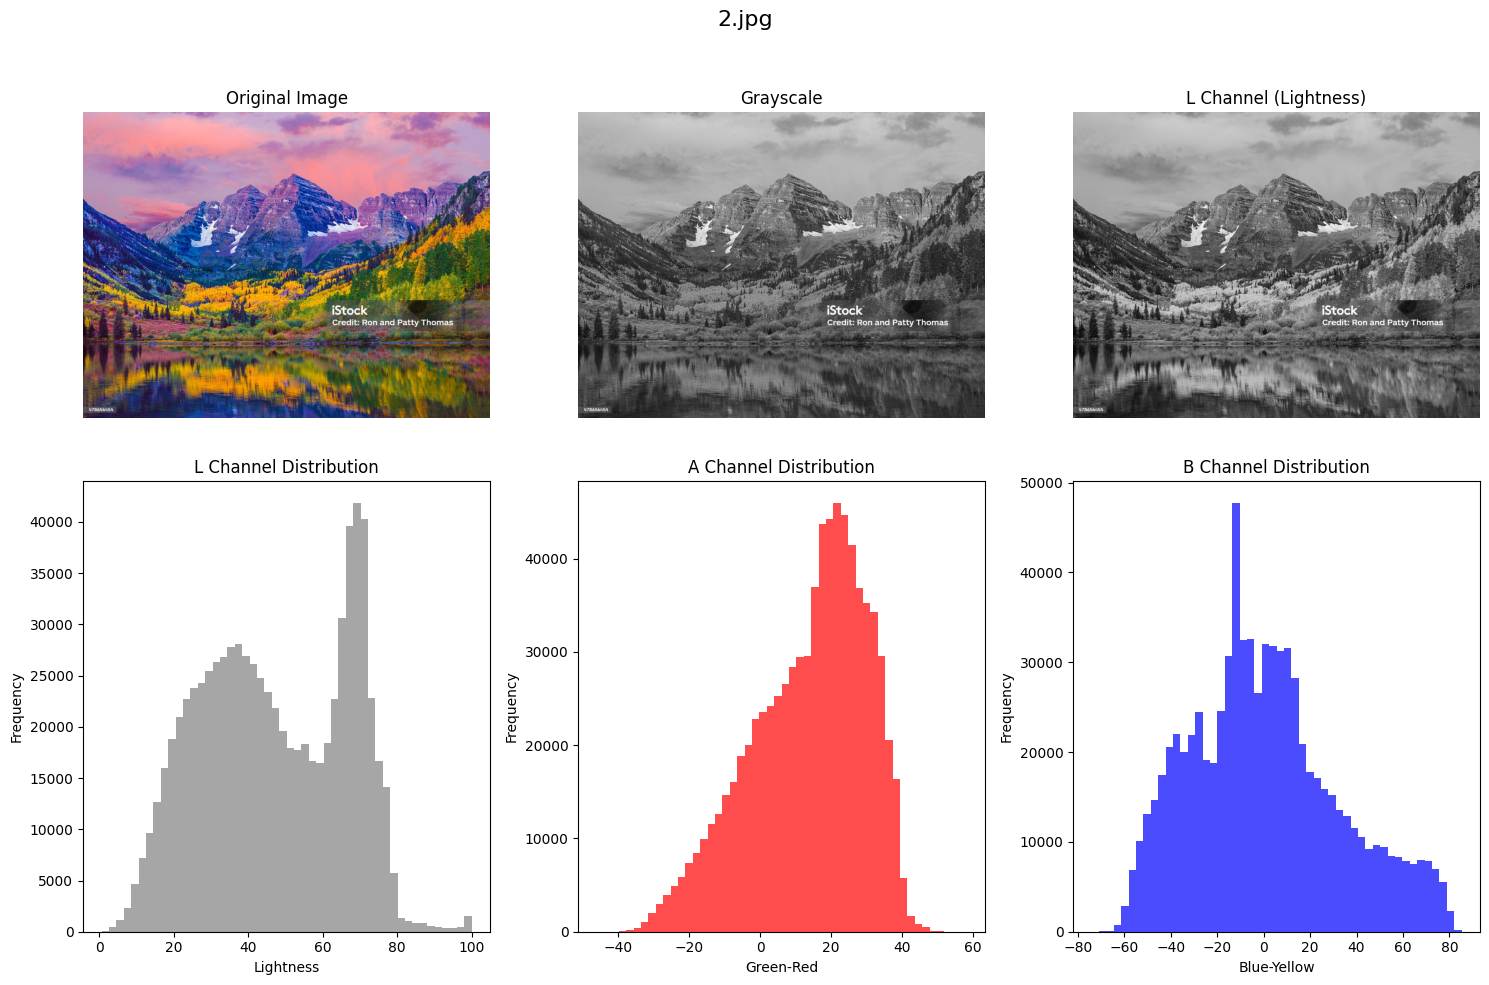


Analyzing: 1.jpg


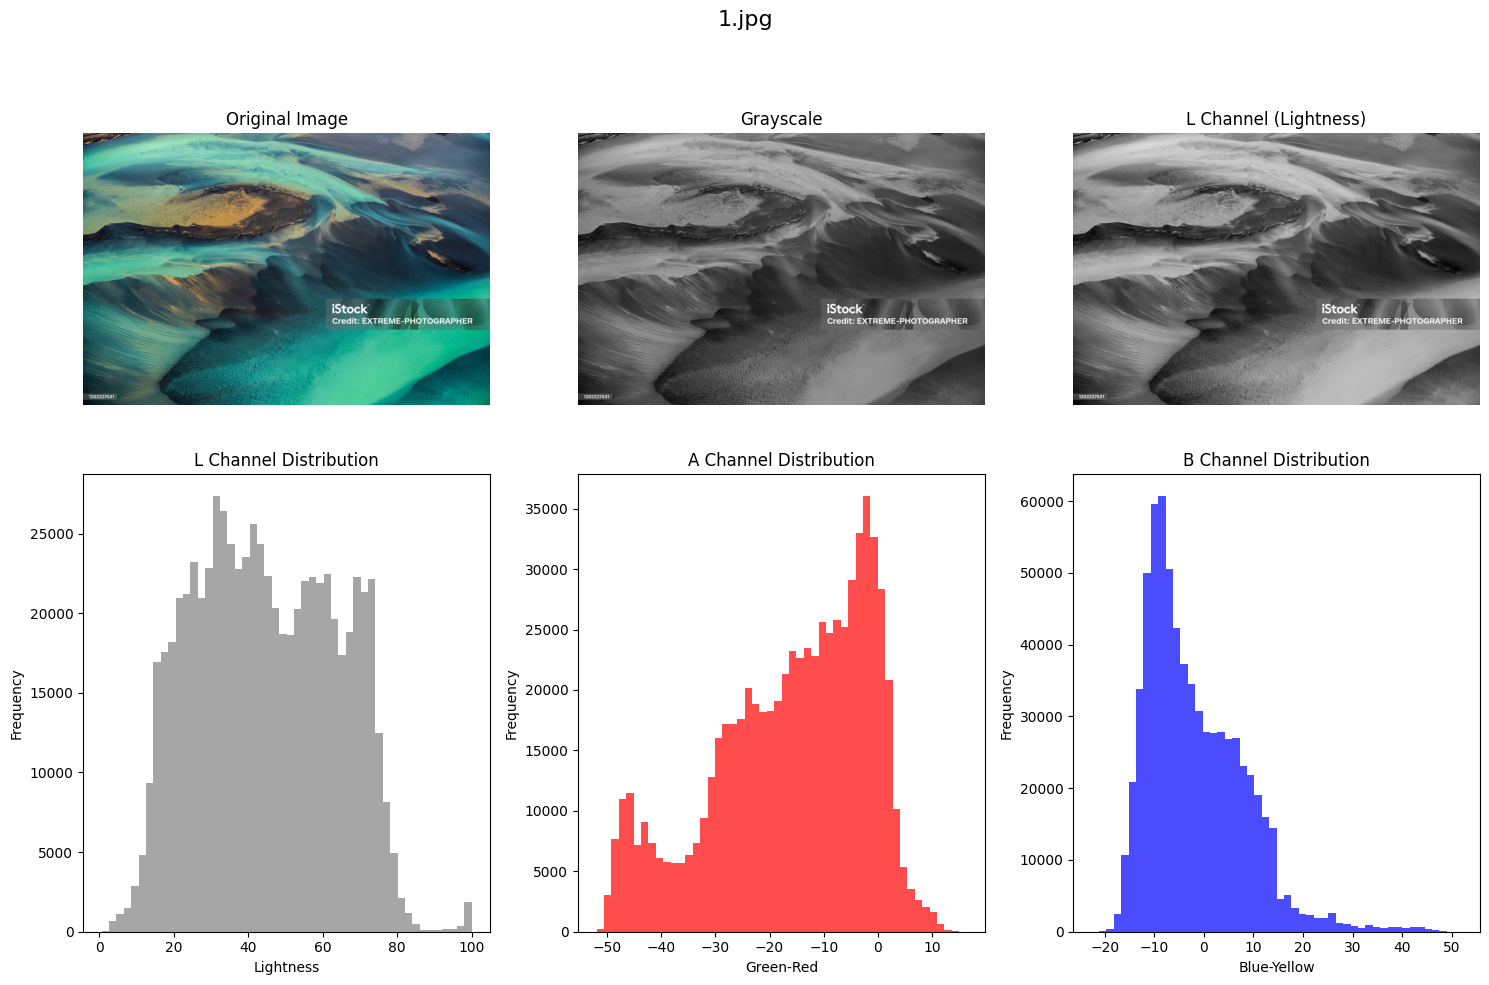


Analyzing: restaurant.jpg


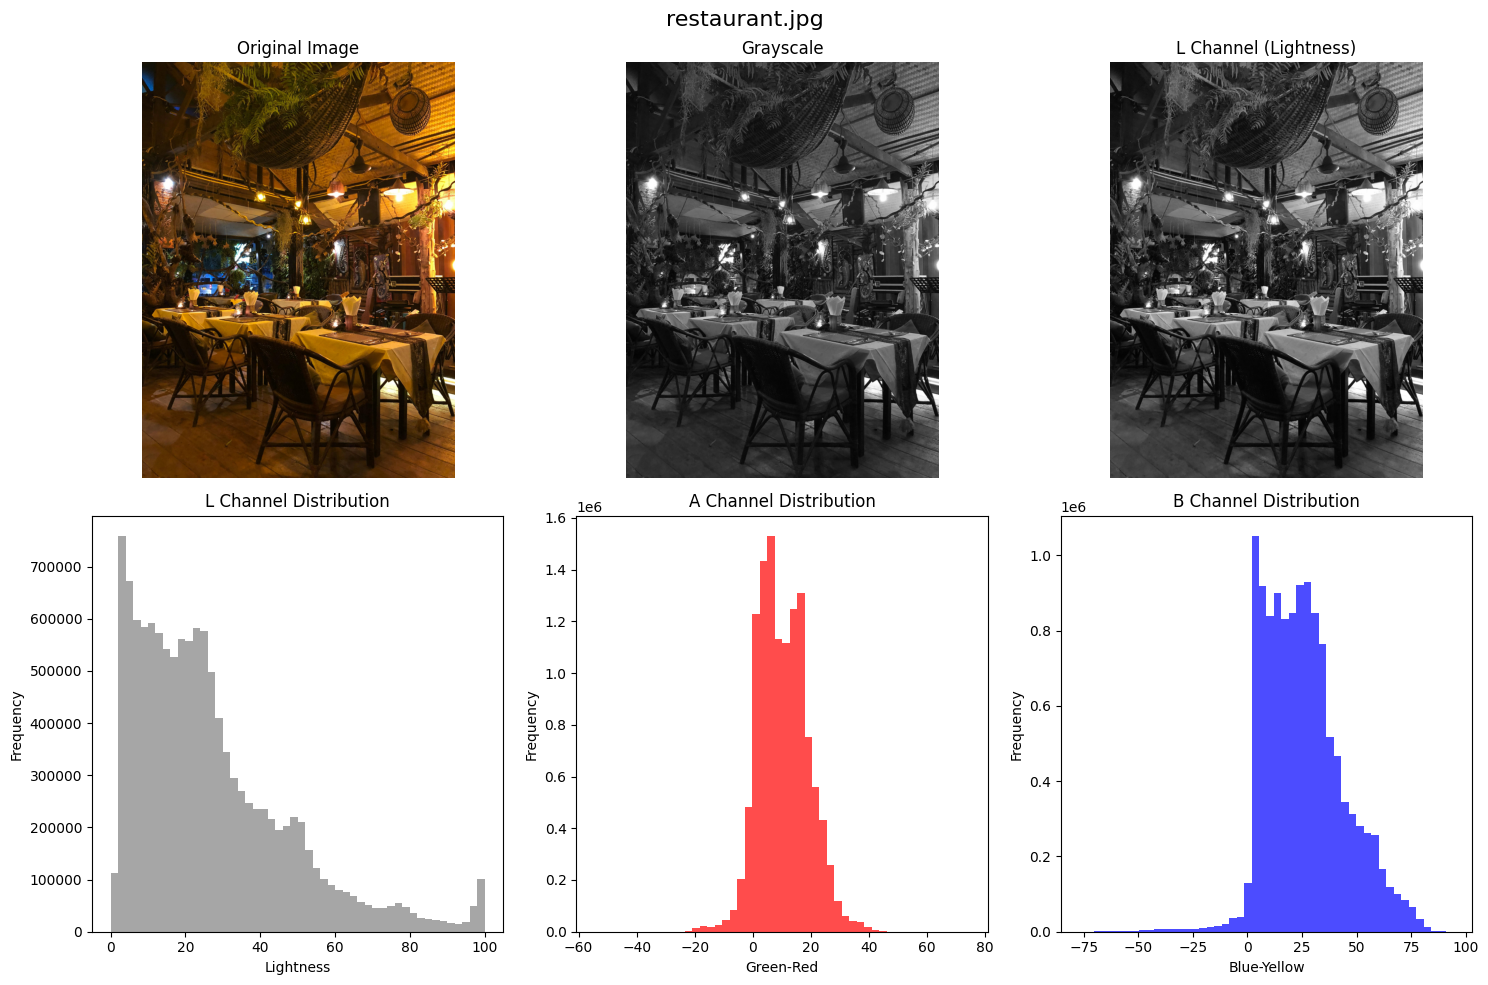

In [14]:
# Analyze color distribution of sample images
def analyze_colors(directory, num_samples=5):
    """Analyze color distribution of sample images."""
    if not os.path.exists(directory) or count_images(directory) == 0:
        print(f"No images found in {directory}")
        return
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    image_files = []
    
    for file in os.listdir(directory):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_files.append(os.path.join(directory, file))
    
    # Random sample
    if len(image_files) > num_samples:
        image_files = np.random.choice(image_files, num_samples, replace=False)
    
    for img_path in image_files:
        try:
            print(f"\nAnalyzing: {os.path.basename(img_path)}")
            visualize_color_distribution(img_path, title=os.path.basename(img_path))
        except Exception as e:
            print(f"Error analyzing {img_path}: {e}")

# Analyze colors of sample images
if train_count > 0:
    print("Color Distribution Analysis:")
    analyze_colors(train_dir, num_samples=3)

## 5. Data Quality Check

In [15]:
# Check for potential issues
def check_data_quality(directory):
    """Check for potential data quality issues."""
    if not os.path.exists(directory) or count_images(directory) == 0:
        return
    
    print(f"\nData Quality Check for {directory}:")
    print("-" * 50)
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    issues = []
    
    image_files = []
    for file in os.listdir(directory):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_files.append(os.path.join(directory, file))
    
    small_images = 0
    large_images = 0
    corrupted_images = 0
    grayscale_images = 0
    
    for img_path in image_files[:50]:  # Check first 50 images
        try:
            with Image.open(img_path) as img:
                # Check size
                if img.width < 64 or img.height < 64:
                    small_images += 1
                
                if img.width > 4000 or img.height > 4000:
                    large_images += 1
                
                # Check if grayscale
                if img.mode in ['L', '1']:
                    grayscale_images += 1
                elif img.mode == 'RGB':
                    # Check if RGB image is actually grayscale
                    img_array = np.array(img)
                    if len(img_array.shape) == 3:
                        r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
                        if np.allclose(r, g) and np.allclose(g, b):
                            grayscale_images += 1
                
        except Exception as e:
            corrupted_images += 1
            print(f"  Corrupted: {os.path.basename(img_path)}")
    
    # Report issues
    total_checked = min(50, len(image_files))
    
    print(f"Images checked: {total_checked}")
    print(f"Small images (<64px): {small_images}")
    print(f"Large images (>4000px): {large_images}")
    print(f"Grayscale images: {grayscale_images}")
    print(f"Corrupted images: {corrupted_images}")
    
    if small_images > 0:
        print("⚠️  Warning: Small images may reduce training quality")
    
    if large_images > 0:
        print("⚠️  Warning: Large images will be resized, consider preprocessing")
    
    if grayscale_images > total_checked * 0.5:
        print("⚠️  Warning: Many grayscale images found - this is unusual for colorization")
    
    if corrupted_images > 0:
        print("❌ Error: Corrupted images found - please remove them")

# Check all splits
for directory in [train_dir, val_dir, test_dir]:
    if count_images(directory) > 0:
        check_data_quality(directory)


Data Quality Check for ../data/raw\train:
--------------------------------------------------
Images checked: 9
Small images (<64px): 0
Large images (>4000px): 6
Grayscale images: 0
Corrupted images: 0
⚠️  Warning: Large images will be resized, consider preprocessing

Data Quality Check for ../data/raw\val:
--------------------------------------------------
Images checked: 9
Small images (<64px): 0
Large images (>4000px): 6
Grayscale images: 0
Corrupted images: 0
⚠️  Warning: Large images will be resized, consider preprocessing

Data Quality Check for ../data/raw\test:
--------------------------------------------------
Images checked: 9
Small images (<64px): 0
Large images (>4000px): 6
Grayscale images: 0
Corrupted images: 0
⚠️  Warning: Large images will be resized, consider preprocessing


## 6. Recommendations

In [16]:
# Provide recommendations based on analysis
print("Dataset Recommendations:")
print("=" * 50)

if total_count == 0:
    print("❌ NO IMAGES FOUND!")
    print("Please add color images to the data/raw/ directories.")
    print("\nSuggested datasets:")
    print("- ImageNet subset")
    print("- COCO dataset")
    print("- Places365")
    print("- Your own collection of color photos")
    
elif total_count < 1000:
    print("⚠️  SMALL DATASET")
    print(f"You have {total_count} images, which is quite small for deep learning.")
    print("Recommendations:")
    print("- Add more images if possible")
    print("- Use heavy data augmentation")
    print("- Consider transfer learning")
    print("- Use smaller model architectures")
    
elif total_count < 10000:
    print("✓ MODERATE DATASET")
    print(f"You have {total_count} images, which is reasonable.")
    print("Recommendations:")
    print("- Use moderate data augmentation")
    print("- Monitor for overfitting")
    print("- Consider pre-trained backbones")
    
else:
    print("✅ LARGE DATASET")
    print(f"You have {total_count} images, which is excellent!")
    print("Recommendations:")
    print("- You can use larger models")
    print("- Light to moderate augmentation should suffice")
    print("- Train for more epochs")

print("\nNext Steps:")
print("1. If you need more images, check the README for dataset sources")
print("2. Run notebook 02_data_preprocessing.ipynb to prepare your data")
print("3. Experiment with augmentation in notebook 03_augmentation_experiments.ipynb")

Dataset Recommendations:
⚠️  SMALL DATASET
You have 27 images, which is quite small for deep learning.
Recommendations:
- Add more images if possible
- Use heavy data augmentation
- Consider transfer learning
- Use smaller model architectures

Next Steps:
1. If you need more images, check the README for dataset sources
2. Run notebook 02_data_preprocessing.ipynb to prepare your data
3. Experiment with augmentation in notebook 03_augmentation_experiments.ipynb


## Summary

This notebook analyzed your dataset structure, image properties, and quality. Use the insights to:

1. **Dataset Size**: Determine if you need more data
2. **Image Quality**: Identify and fix any issues
3. **Color Distribution**: Understand the variety in your dataset
4. **Next Steps**: Proceed with data preprocessing and model training

Remember: Good data is crucial for good results in deep learning!